In [1]:
#importing required libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets

In [2]:
#Downloading data
!wget -c https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -vxf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2022-05-06 12:09:28--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  35.0MB/s    in 6.5s    

2022-05-06 12:09:35 (24.9 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [3]:
#Function to unpickle data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#Loading data
ROOT_PATH='./'  
batch1 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_1")
batch2 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_2")
batch3 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_3")
batch4 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_4")
batch5 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_5")
test_batch = unpickle(ROOT_PATH+"cifar-10-batches-py/test_batch")


def load_data0(btch):
    labels = btch[b'labels']
    imgs = btch[b'data'].reshape((-1, 32, 32, 3))
    
    res = []
    for ii in range(imgs.shape[0]):
        img = imgs[ii].copy()
        img = np.fliplr(np.rot90(np.transpose(img.flatten().reshape(3,32,32)), k=-1))
        res.append(img)
    imgs = np.stack(res)
    return labels, imgs

#Function to load data
def load_data():
    x_train_l = []
    y_train_l = []
    for ibatch in [batch1, batch2, batch3, batch4, batch5]:
        labels, imgs = load_data0(ibatch)
        x_train_l.append(imgs)
        y_train_l.extend(labels)
    x_train = np.vstack(x_train_l)
    y_train = np.vstack(y_train_l)
    
    x_test_l = []
    y_test_l = []
    labels, imgs = load_data0(test_batch)
    x_test_l.append(imgs)
    y_test_l.extend(labels)
    x_test = np.vstack(x_test_l)
    y_test = np.vstack(y_test_l)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
X = x_train.reshape(50000, 3*32*32)
Xt = x_test.reshape(10000, 3*32*32)
y = y_train.flatten()
yt = y_test.flatten()

To Do : Accuracy and types of models for logistic regression 

To Do : Implement SVM, and plot its accuracy for its types and plot there accuraries

In [5]:
#Normaizer new thing 
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV

In [6]:
#Min Max scalar
#Fitting data for train 
min_max = MinMaxScaler()
x_train_mm = min_max.fit_transform(X)
lr_l1_mm = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga').fit(x_train_mm[:10000], y_train[:10000])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.

In [12]:
accuracy = []
predicted_labels_mm = lr_l1_mm.predict(x_train_mm)
np.unique((y_train==0).astype(np.int8))
predicted_r_mm = np.round(predicted_labels_mm)
accuracy_l1_train = metrics.accuracy_score(y_train,predicted_labels_mm)
print('Train Accuracy with L1 penalty:',accuracy_l1_train)
accuracy.append(accuracy_l1_train)
x_test_mm = min_max.transform(Xt)
test_predicted_mm = lr_l1_mm.predict(x_test_mm)
accuracy_l1_test = metrics.accuracy_score(y_test,test_predicted_mm)
print('Test Accuracy with L1 penalty:',accuracy_l1_test)
accuracy.append(accuracy_l1_test)

Train Accuracy with L1 penalty: 0.40998
Test Accuracy with L1 penalty: 0.3889


In [8]:
lr_l2_mm = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='saga').fit(x_train_mm[:10000], y_train[:10000])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.

In [11]:
predicted_labels_mm = lr_l2_mm.predict(x_train_mm)
np.unique((y_train==0).astype(np.int8))
predicted_r_mm = np.round(predicted_labels_mm)
accuracy_l2_train = metrics.accuracy_score(y_train,predicted_labels_mm)
print('Train Accuracy with L2 penalty:',accuracy_l2_train)
accuracy.append(accuracy_l2_train)
x_test_mm = min_max.transform(Xt)
test_predicted_mm = lr_l2_mm.predict(x_test_mm)
accuracy_l2_test = metrics.accuracy_score(y_test,test_predicted_mm)
print('Test Accuracy with L2 penalty:',accuracy_l2_test)
accuracy.append(accuracy_l2_test)

Train Accuracy with L2 penalty: 0.4069
Test Accuracy with L2 penalty: 0.3961


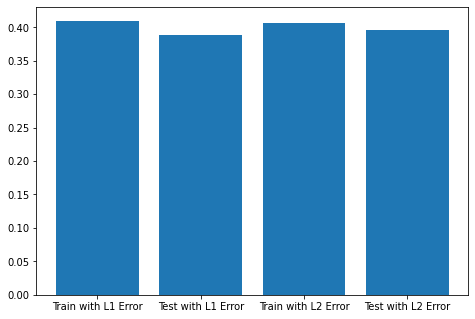

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tags = ['Train with L1 Error','Test with L1 Error','Train with L2 Error','Test with L2 Error']
ax.bar(tags,accuracy)
plt.show()